# 6.3 Exporing Geographical Visualizations

This script contains the following points:

1) Importing Libraries and Data
2) Data Wrangling and Cleaning
3) Exploring Relations via a Choropleth

<font size="4"> 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# Define Path

path=r'C:\Users\dell\Desktop\Career Foundry\6.0 Immersion - Project Folder'

In [4]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\dell\Desktop\Career Foundry\6.0 Immersion - Project Folder/02 Data/Original Data/us-states.json'

In [5]:
# Import data set df_trips_clean.pkl

df_trips_clean=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_trips_clean.pkl'))

In [6]:
df_trips_clean.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [7]:
df_trips_clean.shape

(4828232, 22)

In [8]:
#Convert Level column into subgroups
df_nation=df_trips_clean[df_trips_clean['Level'] =='National']
df_state=df_trips_clean[df_trips_clean['Level'] =='State']
df_county=df_trips_clean[df_trips_clean['Level'] =='County']

In [9]:
df_state.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
887,State,2019/01/01,32.0,NV,NaN,NaN,753054.0,2272063.0,9139676.0,2999886.0,...,1378024.0,1108436.0,222837.0,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0,1
888,State,2019/01/01,12.0,FL,NaN,NaN,4524666.0,16709556.0,55258300.0,16036792.0,...,7977612.0,6604304.0,2113009.0,796740.0,412224.0,95341.0,93887.0,12-00000-20190101,0,1
889,State,2019/01/01,11.0,DC,NaN,NaN,241030.0,459278.0,3114055.0,1314825.0,...,344116.0,183744.0,42096.0,10730.0,8109.0,3476.0,5616.0,11-00000-20190101,0,1
890,State,2019/01/01,10.0,DE,NaN,NaN,224457.0,739757.0,2420942.0,584323.0,...,370359.0,314102.0,128454.0,50542.0,22701.0,2474.0,2198.0,10-00000-20190101,0,1
891,State,2019/01/01,9.0,CT,NaN,NaN,853894.0,2707851.0,9468961.0,2375021.0,...,1331356.0,1211252.0,449947.0,192960.0,56618.0,12031.0,31268.0,09-00000-20190101,0,1


In [10]:
df_state.shape

(77724, 22)

<Axes: xlabel='Number of Trips', ylabel='Count'>

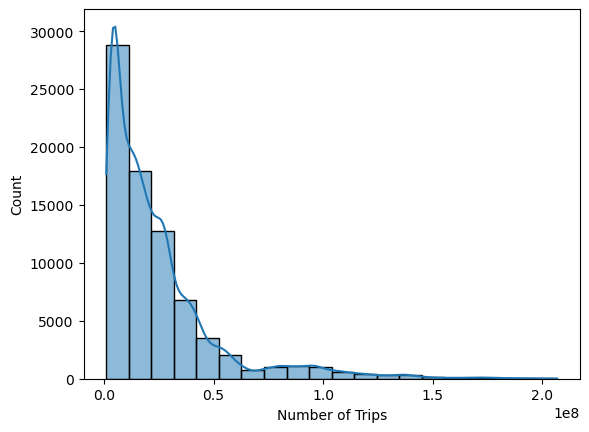

In [11]:
sns.histplot(df_state['Number of Trips'],bins=20, kde = True)

In [12]:
data_to_plot_st = df_state[['State Postal Code','Number of Trips']]

In [13]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map to bind Pandas Data Frames and json geometries
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_st,
    columns = ['State Postal Code', 'Number of Trips'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Trips").add_to(map)
folium.LayerControl().add_to(map)

map

<font size="3"> The choropleth for "Number of trips" by state isn't very insightful. First, looking at the histogram, the data is right skewed, indicating less overall trips. The higher number of trips occur in states with larger populations. A percentage of trips per total populations would be more beneficial.

<font size="4"> 2. Data Wrangling and Cleaning

In [14]:
# Import 2019 population data set SCPRC-EST2019-18+POP-RES.csv

df_2019POP=pd.read_csv(os.path.join(path,'02 Data','Original Data','SCPRC-EST2019-18+POP-RES.csv'))

In [15]:
df_2019POP.shape

(53, 8)

In [16]:
df_2019POP.head(5)

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8


In [17]:
# Establishing a Key based off State FIPS

df_2019POP.rename(columns={'STATE':'State FIPS'},inplace=True)

In [18]:
df_2019POP.head(5)

,SUMLEV,REGION,DIVISION,State FIPS,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8


In [19]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77724 entries, 887 to 4867655
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Level                           77724 non-null  object 
 1   Date                            77724 non-null  object 
 2   State FIPS                      77724 non-null  float64
 3   State Postal Code               77724 non-null  object 
 4   County FIPS                     0 non-null      float64
 5   County Name                     0 non-null      object 
 6   Population Staying at Home      77724 non-null  float64
 7   Population Not Staying at Home  77724 non-null  float64
 8   Number of Trips                 77724 non-null  float64
 9   Number of Trips <1              77724 non-null  float64
 10  Number of Trips 1-3             77724 non-null  float64
 11  Number of Trips 3-5             77724 non-null  float64
 12  Number of Trips 5-10        

In [20]:
df_2019POP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SUMLEV             53 non-null     int64  
 1   REGION             53 non-null     object 
 2   DIVISION           53 non-null     object 
 3   State FIPS         53 non-null     int64  
 4   NAME               53 non-null     object 
 5   POPESTIMATE2019    53 non-null     int64  
 6   POPEST18PLUS2019   53 non-null     int64  
 7   PCNT_POPEST18PLUS  53 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.4+ KB


In [21]:
# Converting the 2019 Population State FIPS to match original data type

df_2019POP['State FIPS'] = df_2019POP['State FIPS'].astype(float)

In [22]:
df_2019POP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SUMLEV             53 non-null     int64  
 1   REGION             53 non-null     object 
 2   DIVISION           53 non-null     object 
 3   State FIPS         53 non-null     float64
 4   NAME               53 non-null     object 
 5   POPESTIMATE2019    53 non-null     int64  
 6   POPEST18PLUS2019   53 non-null     int64  
 7   PCNT_POPEST18PLUS  53 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 3.4+ KB


In [23]:
df_state['Date'].info

<bound method Series.info of 887        2019/01/01
888        2019/01/01
889        2019/01/01
890        2019/01/01
891        2019/01/01
              ...    
4867651    2023/03/04
4867652    2023/03/04
4867653    2023/03/04
4867654    2023/03/04
4867655    2023/03/04
Name: Date, Length: 77724, dtype: object>

In [24]:
#Importing RegEx for wildcard search to shorten 'Date' variable into 'Year' to establish a second key for a data merge

import re

In [25]:
result = []

for value in df_state['Date']:
              if re.search('2019.+',value): result.append("2019")
              elif re.search('2020.+',value): result.append("2020")
              elif re.search('2021.+',value): result.append("2021")
              elif re.search('2022.+',value): result.append("2022")
              elif re.search('2023.+',value): result.append("2023")

In [26]:
df_state['Year'] = result

C:\Users\dell\AppData\Local\Temp\ipykernel_2268\3570386497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Year'] = result


In [27]:
df_state.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year
887,State,2019/01/01,32.0,NV,NaN,NaN,753054.0,2272063.0,9139676.0,2999886.0,...,1108436.0,222837.0,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0,1,2019
888,State,2019/01/01,12.0,FL,NaN,NaN,4524666.0,16709556.0,55258300.0,16036792.0,...,6604304.0,2113009.0,796740.0,412224.0,95341.0,93887.0,12-00000-20190101,0,1,2019
889,State,2019/01/01,11.0,DC,NaN,NaN,241030.0,459278.0,3114055.0,1314825.0,...,183744.0,42096.0,10730.0,8109.0,3476.0,5616.0,11-00000-20190101,0,1,2019
890,State,2019/01/01,10.0,DE,NaN,NaN,224457.0,739757.0,2420942.0,584323.0,...,314102.0,128454.0,50542.0,22701.0,2474.0,2198.0,10-00000-20190101,0,1,2019
891,State,2019/01/01,9.0,CT,NaN,NaN,853894.0,2707851.0,9468961.0,2375021.0,...,1211252.0,449947.0,192960.0,56618.0,12031.0,31268.0,09-00000-20190101,0,1,2019


In [28]:
df_state.tail(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year
4867651,State,2023/03/04,10.0,DE,NaN,NaN,211619.0,762145.0,4023622.0,1042405.0,...,586191.0,225768.0,78059.0,31392.0,2515.0,1658.0,10-00000-20230304,9,3,2023
4867652,State,2023/03/04,23.0,ME,NaN,NaN,311188.0,1033024.0,5606305.0,1221191.0,...,998982.0,342520.0,122530.0,42109.0,4556.0,3938.0,23-00000-20230304,9,3,2023
4867653,State,2023/03/04,40.0,OK,NaN,NaN,784576.0,3172395.0,16703129.0,4254961.0,...,2714676.0,946681.0,425412.0,181119.0,21157.0,9580.0,40-00000-20230304,9,3,2023
4867654,State,2023/03/04,55.0,WI,NaN,NaN,1161293.0,4661141.0,26844129.0,6815070.0,...,4114436.0,1461097.0,590071.0,303262.0,43997.0,24296.0,55-00000-20230304,9,3,2023
4867655,State,2023/03/04,54.0,WV,NaN,NaN,392626.0,1399521.0,7282915.0,1729160.0,...,1130500.0,432634.0,180154.0,86987.0,12732.0,2819.0,54-00000-20230304,9,3,2023


<font size="3"> Head/Tail review of df_state confirms Year column now present and accurattely associated with data.

In [29]:
#Adding Key to 2019 population estimates to finalize merge of data

df_2019POP['Year'] = '2019'

In [30]:
df_2019POP.head(5)

,SUMLEV,REGION,DIVISION,State FIPS,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,Year
0,10,0,0,0.0,United States,328239523,255200373,77.7,2019
1,40,3,6,1.0,Alabama,4903185,3814879,77.8,2019
2,40,4,9,2.0,Alaska,731545,551562,75.4,2019
3,40,4,8,4.0,Arizona,7278717,5638481,77.5,2019
4,40,3,7,5.0,Arkansas,3017804,2317649,76.8,2019


In [31]:
df_2019merge = df_state.merge(df_2019POP, on = ['State FIPS','Year'], indicator = True)

In [32]:
df_2019merge.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Month,Year,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,_merge
0,State,2019/01/01,32.0,NV,NaN,NaN,753054.0,2272063.0,9139676.0,2999886.0,...,1,2019,40,4,8,Nevada,3080156,2387517,77.5,both
1,State,2019/01/02,32.0,NV,NaN,NaN,624619.0,2400498.0,11158466.0,3431160.0,...,1,2019,40,4,8,Nevada,3080156,2387517,77.5,both
2,State,2019/01/03,32.0,NV,NaN,NaN,638451.0,2386666.0,11163208.0,3403513.0,...,1,2019,40,4,8,Nevada,3080156,2387517,77.5,both
3,State,2019/01/04,32.0,NV,NaN,NaN,626386.0,2398731.0,11112768.0,3284593.0,...,1,2019,40,4,8,Nevada,3080156,2387517,77.5,both
4,State,2019/01/05,32.0,NV,NaN,NaN,644882.0,2380235.0,11052754.0,3280792.0,...,1,2019,40,4,8,Nevada,3080156,2387517,77.5,both


<font size="3"> 2019 estimated population sucessfuly merged into df_state dataframe

In [33]:
df_2019cleanmerge = df_2019merge.drop(['SUMLEV','REGION','DIVISION','POPEST18PLUS2019','PCNT_POPEST18PLUS','_merge'],axis=1)

In [34]:
df_2019cleanmerge.rename(columns={'NAME':'State Name','POPESTIMATE2019':'Population Estimate'},inplace=True)

In [35]:
df_2019cleanmerge.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate
0,State,2019/01/01,32.0,NV,NaN,NaN,753054.0,2272063.0,9139676.0,2999886.0,...,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0,1,2019,Nevada,3080156
1,State,2019/01/02,32.0,NV,NaN,NaN,624619.0,2400498.0,11158466.0,3431160.0,...,114576.0,77181.0,26889.0,17186.0,32-00000-20190102,0,1,2019,Nevada,3080156
2,State,2019/01/03,32.0,NV,NaN,NaN,638451.0,2386666.0,11163208.0,3403513.0,...,121031.0,78739.0,27859.0,18361.0,32-00000-20190103,0,1,2019,Nevada,3080156
3,State,2019/01/04,32.0,NV,NaN,NaN,626386.0,2398731.0,11112768.0,3284593.0,...,124515.0,82465.0,28184.0,17817.0,32-00000-20190104,0,1,2019,Nevada,3080156
4,State,2019/01/05,32.0,NV,NaN,NaN,644882.0,2380235.0,11052754.0,3280792.0,...,123011.0,75647.0,25570.0,16526.0,32-00000-20190105,0,1,2019,Nevada,3080156


In [36]:
# Importing 2020 to 2023 estimated population data set NST-EST2022-ALLDATA.csv

df_TO_2022POP=pd.read_csv(os.path.join(path,'02 Data','Original Data','NST-EST2022-ALLDATA.csv'))

In [37]:
df_TO_2022POP.shape

(66, 18)

In [38]:
df_TO_2022POP.head(5)

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,NPOPCHG_2021,NPOPCHG_2022,BIRTHS2020,BIRTHS2021,BIRTHS2022,DEATHS2020,DEATHS2021,DEATHS2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,520042,1256003,894123,3582436,3688179,852024,3438423,3443099
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,-189641,-218851,146120,572782,593222,192891,560931,564007
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,47272,7803,35417,139206,146423,46182,143894,149549
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,-236913,-226654,110703,433576,446799,146709,417037,414458
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,-124538,-48910,190131,747700,759934,186324,761965,768572


<font size="3"> Estimated populations for 2020 to 2023 each have a dedicated column. Data needs to be converted per row with estimates appearing only in "Population Estimate" column.

In [39]:
df_TO_2022POP.rename(columns={'STATE':'State FIPS','NAME': 'State Name',},inplace=True)

In [40]:
df_TO_2022POP['State FIPS'] = df_TO_2022POP['State FIPS'].astype(float)

In [41]:
# Structing a dataframe to handle only 2020 population estimate

df_POPdrop2020 = df_TO_2022POP.drop(['ESTIMATESBASE2020','NPOPCHG_2020','NPOPCHG_2021','NPOPCHG_2022','BIRTHS2020',
                                        'BIRTHS2021','BIRTHS2022','DEATHS2020','DEATHS2021','DEATHS2022',
                                        'POPESTIMATE2021','POPESTIMATE2022'],axis=1)

In [42]:
df_POPdrop2020.rename(columns={'POPESTIMATE2020':'Population Estimate'},inplace=True)

In [43]:
df_POPdrop2020['Year'] = '2020'

In [44]:
df_POPdrop2020.tail(5)

,SUMLEV,REGION,DIVISION,State FIPS,State Name,Population Estimate,Year
61,40,4,9,53.0,Washington,7724031,2020
62,40,3,5,54.0,West Virginia,1791420,2020
63,40,2,3,55.0,Wisconsin,5896271,2020
64,40,4,8,56.0,Wyoming,577605,2020
65,40,X,X,72.0,Puerto Rico,3281557,2020


In [45]:
df_2020merge = df_state.merge(df_POPdrop2020, on = ['State FIPS','Year'], indicator = True)

In [46]:
df_2020cleanmerge = df_2020merge.drop(['SUMLEV','REGION','DIVISION','_merge'],axis=1)

In [47]:
df_2020cleanmerge.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate
0,State,2020/01/01,28.0,MS,NaN,NaN,603252.0,2383278.0,7629798.0,1695735.0,...,183224.0,93571.0,22897.0,4426.0,28-00000-20200101,0,1,2020,Mississippi,2958141
1,State,2020/01/02,28.0,MS,NaN,NaN,523781.0,2462749.0,8759967.0,1938169.0,...,215377.0,95867.0,22229.0,3570.0,28-00000-20200102,0,1,2020,Mississippi,2958141
2,State,2020/01/03,28.0,MS,NaN,NaN,495893.0,2490637.0,9619561.0,2104293.0,...,232656.0,102251.0,21389.0,3091.0,28-00000-20200103,0,1,2020,Mississippi,2958141
3,State,2020/01/04,28.0,MS,NaN,NaN,538045.0,2448485.0,9088524.0,2009154.0,...,221617.0,98522.0,21472.0,3672.0,28-00000-20200104,0,1,2020,Mississippi,2958141
4,State,2020/01/05,28.0,MS,NaN,NaN,579746.0,2406784.0,8106469.0,1746138.0,...,174702.0,94876.0,23890.0,5047.0,28-00000-20200105,1,1,2020,Mississippi,2958141


In [48]:
# Structing a dataframe to handle only 2021 population estimate

df_POPdrop2021 = df_TO_2022POP.drop(['ESTIMATESBASE2020','NPOPCHG_2020','NPOPCHG_2021','NPOPCHG_2022','BIRTHS2020',
                                        'BIRTHS2021','BIRTHS2022','DEATHS2020','DEATHS2021','DEATHS2022',
                                        'POPESTIMATE2020','POPESTIMATE2022'],axis=1)

In [49]:
df_POPdrop2021.rename(columns={'POPESTIMATE2021':'Population Estimate'},inplace=True)

In [50]:
df_POPdrop2021['Year'] = '2021'

In [51]:
df_POPdrop2021.tail(5)

,SUMLEV,REGION,DIVISION,State FIPS,State Name,Population Estimate,Year
61,40,4,9,53.0,Washington,7740745,2021
62,40,3,5,54.0,West Virginia,1785526,2021
63,40,2,3,55.0,Wisconsin,5880101,2021
64,40,4,8,56.0,Wyoming,579483,2021
65,40,X,X,72.0,Puerto Rico,3262693,2021


In [52]:
df_2021merge = df_state.merge(df_POPdrop2021, on = ['State FIPS','Year'], indicator = True)

In [53]:
df_2021cleanmerge = df_2021merge.drop(['SUMLEV','REGION','DIVISION','_merge'],axis=1)

In [54]:
df_2021cleanmerge.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate
0,State,2021/01/01,5.0,AR,NaN,NaN,784999.0,2228826.0,7726159.0,1586823.0,...,203865.0,115165.0,20948.0,3634.0,05-00000-20210101,0,1,2021,Arkansas,3028122
1,State,2021/01/02,5.0,AR,NaN,NaN,729966.0,2283859.0,8587884.0,1763731.0,...,260379.0,134423.0,22341.0,3498.0,05-00000-20210102,0,1,2021,Arkansas,3028122
2,State,2021/01/03,5.0,AR,NaN,NaN,763321.0,2250504.0,7882031.0,1600879.0,...,202208.0,130032.0,24585.0,3783.0,05-00000-20210103,1,1,2021,Arkansas,3028122
3,State,2021/01/04,5.0,AR,NaN,NaN,601762.0,2412063.0,9555434.0,2184486.0,...,174394.0,90522.0,17358.0,2548.0,05-00000-20210104,1,1,2021,Arkansas,3028122
4,State,2021/01/05,5.0,AR,NaN,NaN,586747.0,2427078.0,9201633.0,2059138.0,...,183763.0,94725.0,20120.0,2417.0,05-00000-20210105,1,1,2021,Arkansas,3028122


In [55]:
# Structing a dataframe to handle only 2022 population estimate

df_POPdrop2022 = df_TO_2022POP.drop(['ESTIMATESBASE2020','NPOPCHG_2020','NPOPCHG_2021','NPOPCHG_2022','BIRTHS2020',
                                        'BIRTHS2021','BIRTHS2022','DEATHS2020','DEATHS2021','DEATHS2022',
                                        'POPESTIMATE2020','POPESTIMATE2021'],axis=1)

In [56]:
df_POPdrop2022.rename(columns={'POPESTIMATE2022':'Population Estimate'},inplace=True)

In [57]:
df_POPdrop2022['Year'] = '2022'

In [58]:
df_POPdrop2022.tail(5)

,SUMLEV,REGION,DIVISION,State FIPS,State Name,Population Estimate,Year
61,40,4,9,53.0,Washington,7785786,2022
62,40,3,5,54.0,West Virginia,1775156,2022
63,40,2,3,55.0,Wisconsin,5892539,2022
64,40,4,8,56.0,Wyoming,581381,2022
65,40,X,X,72.0,Puerto Rico,3221789,2022


In [59]:
df_2022merge = df_state.merge(df_POPdrop2022, on = ['State FIPS','Year'], indicator = True)

In [60]:
df_2022cleanmerge = df_2022merge.drop(['SUMLEV','REGION','DIVISION','_merge'],axis=1)

In [61]:
df_2022cleanmerge.tail(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate
18610,State,2022/11/22,54.0,WV,NaN,NaN,352196.0,1439951.0,7677834.0,1741833.0,...,178921.0,64799.0,9035.0,2474.0,54-00000-20221122,47,11,2022,West Virginia,1775156
18611,State,2022/11/23,54.0,WV,NaN,NaN,346586.0,1445561.0,6967317.0,1533670.0,...,184648.0,69655.0,10084.0,2469.0,54-00000-20221123,47,11,2022,West Virginia,1775156
18612,State,2022/11/24,54.0,WV,NaN,NaN,378694.0,1413453.0,6169186.0,1230897.0,...,191162.0,67662.0,7936.0,2580.0,54-00000-20221124,47,11,2022,West Virginia,1775156
18613,State,2022/11/25,54.0,WV,NaN,NaN,364500.0,1427647.0,7439170.0,1706360.0,...,201128.0,72696.0,8578.0,2731.0,54-00000-20221125,47,11,2022,West Virginia,1775156
18614,State,2022/11/26,54.0,WV,NaN,NaN,363403.0,1428744.0,7254827.0,1601040.0,...,199193.0,75695.0,9124.0,2703.0,54-00000-20221126,47,11,2022,West Virginia,1775156


In [62]:
#Merging all 2019 to 2022 dataframes back together into df_state_pop

frames = [df_2019cleanmerge,df_2020cleanmerge,df_2021cleanmerge, df_2022cleanmerge]
df_state_pop = pd.concat(frames)

In [63]:
df_state.shape

(77724, 23)

In [64]:
df_state_pop.shape

(74511, 25)

In [65]:
df_state.groupby(['Year']).count()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
Year,,,,,,,,,,,,,,,,,,,,,
2019,18615,18615,18615,18615,0,0,18615,18615,18615,18615,...,18615,18615,18615,18615,18615,18615,18615,18615,18615,18615
2020,18666,18666,18666,18666,0,0,18666,18666,18666,18666,...,18666,18666,18666,18666,18666,18666,18666,18666,18666,18666
2021,18615,18615,18615,18615,0,0,18615,18615,18615,18615,...,18615,18615,18615,18615,18615,18615,18615,18615,18615,18615
2022,18615,18615,18615,18615,0,0,18615,18615,18615,18615,...,18615,18615,18615,18615,18615,18615,18615,18615,18615,18615
2023,3213,3213,3213,3213,0,0,3213,3213,3213,3213,...,3213,3213,3213,3213,3213,3213,3213,3213,3213,3213


<font size="3"> Descrease between df_state to df_state_pop is a result of records with Year = 2023 not having an Estimated population.  

In [66]:
df_state_pop.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate
0,State,2019/01/01,32.0,NV,NaN,NaN,753054.0,2272063.0,9139676.0,2999886.0,...,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0,1,2019,Nevada,3080156
1,State,2019/01/02,32.0,NV,NaN,NaN,624619.0,2400498.0,11158466.0,3431160.0,...,114576.0,77181.0,26889.0,17186.0,32-00000-20190102,0,1,2019,Nevada,3080156
2,State,2019/01/03,32.0,NV,NaN,NaN,638451.0,2386666.0,11163208.0,3403513.0,...,121031.0,78739.0,27859.0,18361.0,32-00000-20190103,0,1,2019,Nevada,3080156
3,State,2019/01/04,32.0,NV,NaN,NaN,626386.0,2398731.0,11112768.0,3284593.0,...,124515.0,82465.0,28184.0,17817.0,32-00000-20190104,0,1,2019,Nevada,3080156
4,State,2019/01/05,32.0,NV,NaN,NaN,644882.0,2380235.0,11052754.0,3280792.0,...,123011.0,75647.0,25570.0,16526.0,32-00000-20190105,0,1,2019,Nevada,3080156


In [67]:
df_state_pop.tail(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate
18610,State,2022/11/22,54.0,WV,NaN,NaN,352196.0,1439951.0,7677834.0,1741833.0,...,178921.0,64799.0,9035.0,2474.0,54-00000-20221122,47,11,2022,West Virginia,1775156
18611,State,2022/11/23,54.0,WV,NaN,NaN,346586.0,1445561.0,6967317.0,1533670.0,...,184648.0,69655.0,10084.0,2469.0,54-00000-20221123,47,11,2022,West Virginia,1775156
18612,State,2022/11/24,54.0,WV,NaN,NaN,378694.0,1413453.0,6169186.0,1230897.0,...,191162.0,67662.0,7936.0,2580.0,54-00000-20221124,47,11,2022,West Virginia,1775156
18613,State,2022/11/25,54.0,WV,NaN,NaN,364500.0,1427647.0,7439170.0,1706360.0,...,201128.0,72696.0,8578.0,2731.0,54-00000-20221125,47,11,2022,West Virginia,1775156
18614,State,2022/11/26,54.0,WV,NaN,NaN,363403.0,1428744.0,7254827.0,1601040.0,...,199193.0,75695.0,9124.0,2703.0,54-00000-20221126,47,11,2022,West Virginia,1775156


<font size="3"> Confirmed df_state_pop contains 2019 and 2023 population estimates

In [68]:
#Creating a percentage comparison between Number of Trips and total estimated population

df_state_pop['Trip_Pop%'] = df_state_pop['Number of Trips'] / df_state_pop['Population Estimate']

In [69]:
df_state_pop.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate,Trip_Pop%
0,State,2019/01/01,32.0,NV,NaN,NaN,753054.0,2272063.0,9139676.0,2999886.0,...,73578.0,24471.0,18427.0,32-00000-20190101,0,1,2019,Nevada,3080156,2.967277
1,State,2019/01/02,32.0,NV,NaN,NaN,624619.0,2400498.0,11158466.0,3431160.0,...,77181.0,26889.0,17186.0,32-00000-20190102,0,1,2019,Nevada,3080156,3.622695
2,State,2019/01/03,32.0,NV,NaN,NaN,638451.0,2386666.0,11163208.0,3403513.0,...,78739.0,27859.0,18361.0,32-00000-20190103,0,1,2019,Nevada,3080156,3.624235
3,State,2019/01/04,32.0,NV,NaN,NaN,626386.0,2398731.0,11112768.0,3284593.0,...,82465.0,28184.0,17817.0,32-00000-20190104,0,1,2019,Nevada,3080156,3.607859
4,State,2019/01/05,32.0,NV,NaN,NaN,644882.0,2380235.0,11052754.0,3280792.0,...,75647.0,25570.0,16526.0,32-00000-20190105,0,1,2019,Nevada,3080156,3.588375


In [70]:
#Creating a percentage comparison between Population Staying at Home and Population Not Staying at Home vs estimated population

df_state_pop['Home_Pop%'] = df_state_pop['Population Staying at Home'] / df_state_pop['Population Estimate']
df_state_pop['NotHome_Pop%'] = df_state_pop['Population Not Staying at Home'] / df_state_pop['Population Estimate']

In [71]:
df_state_pop.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips >=500,Row ID,Week,Month,Year,State Name,Population Estimate,Trip_Pop%,Home_Pop%,NotHome_Pop%
0,State,2019/01/01,32.0,NV,NaN,NaN,753054.0,2272063.0,9139676.0,2999886.0,...,18427.0,32-00000-20190101,0,1,2019,Nevada,3080156,2.967277,0.244486,0.737645
1,State,2019/01/02,32.0,NV,NaN,NaN,624619.0,2400498.0,11158466.0,3431160.0,...,17186.0,32-00000-20190102,0,1,2019,Nevada,3080156,3.622695,0.202788,0.779343
2,State,2019/01/03,32.0,NV,NaN,NaN,638451.0,2386666.0,11163208.0,3403513.0,...,18361.0,32-00000-20190103,0,1,2019,Nevada,3080156,3.624235,0.207279,0.774852
3,State,2019/01/04,32.0,NV,NaN,NaN,626386.0,2398731.0,11112768.0,3284593.0,...,17817.0,32-00000-20190104,0,1,2019,Nevada,3080156,3.607859,0.203362,0.778769
4,State,2019/01/05,32.0,NV,NaN,NaN,644882.0,2380235.0,11052754.0,3280792.0,...,16526.0,32-00000-20190105,0,1,2019,Nevada,3080156,3.588375,0.209367,0.772764


<font size="4"> 3. Exploring Relations via a Choropleth

<Axes: xlabel='Trip_Pop%', ylabel='Count'>

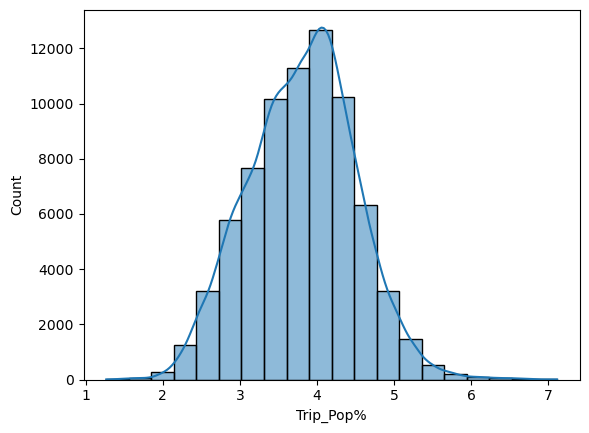

In [72]:
sns.histplot(df_state_pop['Trip_Pop%'],bins=20, kde = True)

<font size="3"> Converting the number of trips per population results in a more normal distribution

In [73]:
data_to_plot_trippop = df_state_pop[['State Postal Code','Trip_Pop%']]

In [74]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map to bind Pandas Data Frames and json geometries
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_trippop,
    columns = ['State Postal Code', 'Trip_Pop%'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "# of Trips per Pop").add_to(map)
folium.LayerControl().add_to(map)

map

<font size="3"> The updated choropleth shows a significant change in all states apart from New York. The amount of trips per total population shows more activity occurred in the Midwest Region than in states with higher populations. Louisana in the Southeast region also had a significant number of trips. While this information doesn't show how COVID impacted travel, a better understanding of travel activity by state has been gained. 

<Axes: xlabel='NotHome_Pop%', ylabel='Count'>

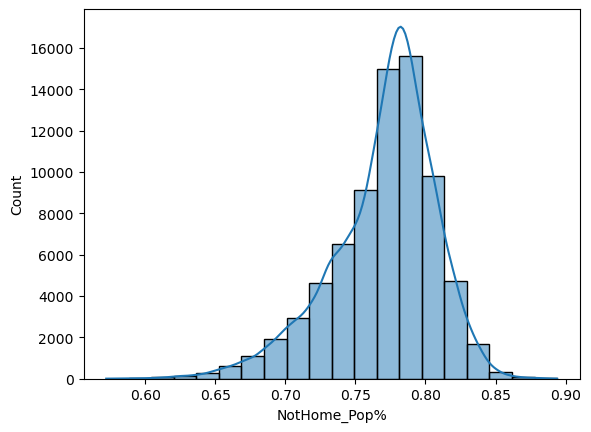

In [75]:
sns.histplot(df_state_pop['NotHome_Pop%'],bins=20, kde = True)

In [76]:
data_to_plot_NHpop = df_state_pop[['State Postal Code','NotHome_Pop%']]

In [77]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map to bind Pandas Data Frames and json geometries
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_NHpop,
    columns = ['State Postal Code', 'NotHome_Pop%'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "% of Population Not Staying Home").add_to(map)
folium.LayerControl().add_to(map)

map

<Axes: xlabel='Home_Pop%', ylabel='Count'>

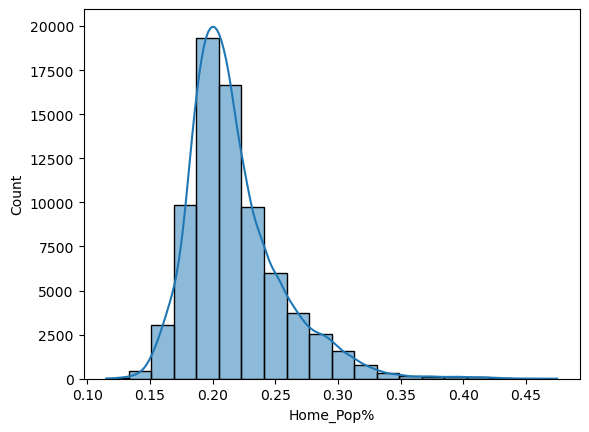

In [78]:
sns.histplot(df_state_pop['Home_Pop%'],bins=20, kde = True)

In [79]:
data_to_plot_Hpop = df_state_pop[['State Postal Code','Home_Pop%']]

In [80]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map to bind Pandas Data Frames and json geometries
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_Hpop,
    columns = ['State Postal Code', 'Home_Pop%'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "% of Population Staying Home").add_to(map)
folium.LayerControl().add_to(map)

map

<font size="3"> Comparing the overall percentages for populations staying at home versus those not staying home shows the Northwest and New York state had the highest amount of individuals not travel. Areas with larger populations taking trips were within the midwest and southeast regions. This information allows us to answer the question of how mobility varied by state. 

In [81]:
# Export data to pkl

df_state_pop.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_state_pop.pkl'))